In [1]:
%run get_song_lyrics.py
song_title = 'Cut It'
artist = 'O.T. Genasis Featuring Young Dolph'
lyrics = get_song_lyrics(song_title,artist)
#print lyrics[2]
lyrics



https://www.musixmatch.com/lyrics/O-T-Genasis-feat-Young-Dolph/Cut-It
found lyrics on musixmatch!


(u"Yeaah\nYeah\nCut it, cut it, cut it, cut it\nCut it, cut it, cut it, cut it\nThem bricks is way too hot, you need to cut it\nYour price is way too high, you need to cut it\nCut it, cut it, cut it, cut it\nCut it, cut it, cut it, cut it\n\nThem bricks is way too hot, you need to cut it\nYour price is way too high, you need to cut it\n\nRunning through bands on the regular\nHittin' my plug on the celly, yeah\nTell my ex bitch that I'm sorry\nImma skate off in the 'Rari\nKeep 36 by my side\nImma go bake me a pie\nKeep 45 on my side\nFuck with my niggas, you die\nAll of my niggas say blood\nAll of my niggas say cuz\nOT, I found me a plug\nI got it straight out the mud\nKeep it a hundred, no budge\nI fell in love with the drugs\nBustin' it down in the tub\nPay me my money in dubs\nWater whippin'\nLookin' like I'm fishin'\nBaseball in kitchen\nWith my arm I'm pitchin'\n\nRolie on, it's glistenin'\n\nAnd my darling, kissin'\nNiggas steady trippin'\nSo I'm steady grippin'\nDirty money on me

In [39]:
import pandas as pd
import numpy as np

lyrics_BB = pd.read_csv('lyrics_and_billboard.csv',encoding='utf-8',header=0,parse_dates='date')


# how many scrapes did i mess up? P!nk, etc
lyrics_BB[lyrics_BB['lyrics'].isnull()].drop_duplicates(subset='title',keep='first').shape[0]

# get rid of the duplicate entries
cleaned_lyrics_BB = lyrics_BB.groupby('title',group_keys=False).apply(lambda x: 
            x.ix[x.peakPos.idxmin()]).drop_duplicates(subset=['title','artist'])
# i have no idea why this column is here
cleaned_lyrics_BB.drop('Unnamed: 0', axis=1,inplace=True)
#for col in cleaned_lyrics_BB:
    #print col, cleaned_lyrics_BB[col].dtype

# drop the na
cleaned_lyrics_BB.dropna(subset=['lyrics'],inplace=True)

cleaned_lyrics_BB_tot = cleaned_lyrics_BB

msk = np.random.rand(len(cleaned_lyrics_BB_tot)) < 0.8

train = cleaned_lyrics_BB_tot[msk]

cleaned_lyrics_BB = cleaned_lyrics_BB_tot[~msk]


# 
lyrics = train['lyrics']

#lyrics_BB.loc[lyrics_BB['title'].isin(['Never Forget You'])]
#lyrics_BB
testL = lyrics[0]
#print testL
no_dumb_punct = re.sub("[,\\.]", " ", testL) 
#print no_dumb_punct

blanks = no_dumb_punct.replace('[?]',"")
qs = blanks.replace("?"," ? ")
exps = qs.replace("!"," ! ")

#cleaned_lyrics_BB["title"][0]
words = exps.lower().split()
from nltk.corpus import stopwords
#print words
#print stopwords
meaningful_words = [w for w in words if not w in stopwords.words("english")]
#print meaningful_words
#print " ".join(meaningful_words)
%run song_to_words.py

lyrics.size


#meaningful_words
#song_to_words(testL)
#from nltk.corpus import wordnet as wn

#nltk.stem.WordNetLemmatizer().lemmatize('lovin', 'v')

81

In [ ]:
def clean_words(words):

In [40]:
%run song_to_words.py

clean_songs = []
for ind in xrange(0,lyrics.size):
    
    clean_songs.append(song_to_words(lyrics[ind]))
    
    

In [41]:
%run words_to_bag.py
# train this up!
[vocab, word_bag, vectorizer] = words_to_bag(clean_songs) 


In [42]:
cleaned_lyrics_BB.index



Index([u'7 Years', u'Cake By The Ocean', u'Can't Stop The Feeling!',
       u'Cheap Thrills', u'Dangerous Woman', u'Feel No Ways', u'Fix',
       u'Hasta El Amanecer', u'I Took A Pill In Ibiza', u'Inside Out',
       u'Into You', u'Kiss It Better', u'La La Land', u'Light It Up',
       u'Middle', u'Never Forget You', u'No Problem', u'Pop Style', u'Sex',
       u'Somewhere On A Beach', u'The Sound Of Silence'],
      dtype='object', name=u'title')

/Users/steeles/anaconda/envs/my_projects_env/lib/python2.7/site-packages/ipykernel/__main__.py:24: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


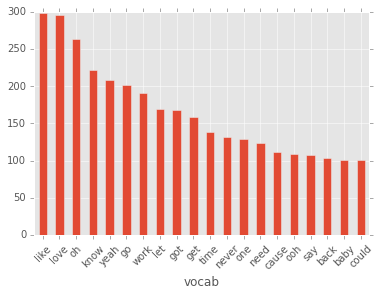

In [114]:

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')
# %matplotib notebook
# Sum up the counts of each vocabulary word
dist = np.sum(word_bag, axis=0)
df = pd.DataFrame(word_bag,columns=vocab,index=train.index)
df.index = train.index
# For each, print the vocabulary word and the number of times it 
# appears in the training set
#vocab

freqDf = pd.DataFrame(zip(vocab,dist),columns=['vocab','dist'])
# for tag, count in zip(vocab, dist):
#      print count, tag
# df

tmp = freqDf.sort(columns='dist',ascending=False)
#h=plt.figure()
#tmp.head(20)
foo = tmp[:20]
foo.plot(x="vocab",y="dist",kind="bar",legend=False,rot=45)
# foo.plot?
#hist()


In [ ]:
tmp[:20].plot.hist

In [ ]:
tmp[:20].plot.hist

In [ ]:
tmp[:20].hist

In [ ]:
tmp[:20].hist

In [123]:
#vectorizer.vocabulary




In [44]:
df = pd.DataFrame(zip(vocab,word_bag))

#df.iloc[]



In [45]:
from sklearn.ensemble import RandomForestClassifier

# Initialize a Random Forest classifier with 100 trees
forest = RandomForestClassifier(n_estimators = 100) 

# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the response variable
#
# This may take a few minutes to run
forest = forest.fit( word_bag, train["chart_name"] )



In [134]:
#sum(cleaned_lyrics_BB['chart_name']=='dance-electronic-songs')

In [46]:
clean_test_songs = [] 

for i in xrange(0,len(cleaned_lyrics_BB)):
    
    clean_song = song_to_words( cleaned_lyrics_BB["lyrics"][i] )
    clean_test_songs.append( clean_song )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vectorizer.transform(clean_test_songs)
test_data_features = test_data_features.toarray()


result = forest.predict(test_data_features)



In [47]:
#len(clean_test_songs)
test_data_features.shape
#type(clean_test_songs)


(21, 2598)

In [48]:
output = pd.DataFrame( data={"realChart":cleaned_lyrics_BB["chart_name"], "prediction":result} )




In [78]:



output

,prediction,realChart
title,,
7 Years,hot-100,hot-100
American Country Love Song,hot-100,hot-100
Came Here To Forget,hot-100,hot-100
Candyman,hot-100,dance-electronic-songs
Fix,hot-100,hot-100
Kiss It Better,hot-100,hot-100
Me Too,hot-100,hot-100
One Dance,hot-100,hot-100
Piece By Piece,hot-100,hot-100


In [49]:

forest = forest.fit( word_bag, train["chart_name"] )

result2 = forest.predict(word_bag)
output = pd.DataFrame( data={"realChart":train["chart_name"], "prediction":result2} )
output

,prediction,realChart
title,,
2 Phones,hot-100,hot-100
9,hot-100,hot-100
American Country Love Song,hot-100,hot-100
Body,hot-100,hot-100
Came Here To Forget,hot-100,hot-100
Candyman,dance-electronic-songs,dance-electronic-songs
Carry Me,dance-electronic-songs,dance-electronic-songs
Childs Play,hot-100,hot-100
Church Bells,hot-100,hot-100


In [50]:
from sklearn import linear_model
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(word_bag,train["chart_name"])

prediction = logreg.predict(test_data_features)
output = pd.DataFrame( data={"realChart":cleaned_lyrics_BB["chart_name"], "prediction":prediction})
print output

                                     prediction               realChart
title                                                                  
7 Years                                 hot-100                 hot-100
Cake By The Ocean                       hot-100                 hot-100
Can't Stop The Feeling!                 hot-100                 hot-100
Cheap Thrills                           hot-100                 hot-100
Dangerous Woman                         hot-100                 hot-100
Feel No Ways                            hot-100                 hot-100
Fix                                     hot-100                 hot-100
Hasta El Amanecer                       hot-100                 hot-100
I Took A Pill In Ibiza                  hot-100                 hot-100
Inside Out                              hot-100  dance-electronic-songs
Into You                                hot-100                 hot-100
Kiss It Better                          hot-100                 

In [64]:
%run get_song_lyrics.py
#artist = 'Celine Dion'
title = 'Faded'

lyrics = get_song_lyrics(title,artist)
print lyrics[0]
words = song_to_words(lyrics[0])
feat = vectorizer.transform([words])

result3 = forest.predict(feat)
print '\nrandom forest guess is ' + result3[0]


result4 = logreg.predict(feat)
print 'logistic regression guess is ' + result4[0]







https://www.musixmatch.com/lyrics/Celine-Dion/Faded
couldn't find on musixmatch
searching chartlyrics
http://www.chartlyrics.com/xfD0ZZ7vDEmu45Ceeuayqw/Fade+to+Black.aspx
-Solo- 
Life it seems, will fade away
Drifting further, everyday
Getting lost, within myself
Nothing matters, no one else
I have lost the will to live
Simply nothing more to give
There is nothing more for me
Need the end to set me free 
-Solo- 
Things not what they used to be
Missing one inside of me
Deathly loss, this can't be real
I cannot stand this hell I feel
Emptiness is filling me
To the point of agony
Growing darkness, taking dawn
I was me, but now he's gone 
No one but me
Can save myself
But it's too late
Now I can't think
Think why I should even try 
Yesterday seems as though
It never existed
Death greets me warm
Now I will just say goodbye
Bye......... 
-Solo-

random forest guess is hot-100
logistic regression guess is hot-100


In [101]:
type(lyrics)

tuple

In [109]:
feat

<1x43 sparse matrix of type '<type 'numpy.int64'>'
	with 43 stored elements in Compressed Sparse Row format>